In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import data_reader
import matplotlib.patches as mpatches
import os
###################################
%matplotlib inline
#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)



In [6]:
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
choices_1,dynamics_1 = dr.get_data(path='../data/experimental_data/exp1/', stim_viewing=False)

choices_1.reset_index(inplace=True)


In [19]:
def plot_figure_1():
    fig1b = pd.read_csv('../figures_output/Fig1_b.txt', sep=',')
    fig1c = pd.read_csv('../figures_output/Fig1_c.txt', sep=',')

    fig1d1 = pd.read_csv('../figures_output/Fig1_d1.txt', sep=',')
    fig1d2 = pd.read_csv('../figures_output/Fig1_d2.txt', sep=',')

    fig_neural, ax_neural = plt.subplots(5, 1)

    ax_neural[0].plot(fig1b.y_1)
    ax_neural[0].plot(fig1b.y_2)
    ax_neural[0].plot(fig1b.y_1_25)
    ax_neural[0].plot(fig1b.y_2_25)

    ax_neural[1].plot(fig1b.y_mc_lu)
    ax_neural[1].plot(fig1b.y_mc_hu)
    ax_neural[1].plot(fig1b.y_mc_lu_25)
    ax_neural[1].plot(fig1b.y_mc_hu_25)

    ax_neural[2].plot(fig1b.y_7)
    ax_neural[2].plot(fig1b.y_8)
    ax_neural[2].plot(fig1b.y_7_25)
    ax_neural[2].plot(fig1b.y_8_25)

    ax_neural[3].plot(fig1b.y_3)
    ax_neural[3].plot(fig1b.y_4)
    ax_neural[3].plot(fig1b.y_3_25)
    ax_neural[3].plot(fig1b.y_4_25)

    ax_neural[4].plot(fig1b.y_5)
    ax_neural[4].plot(fig1b.y_6)
    ax_neural[4].plot(fig1b.y_5_25)
    ax_neural[4].plot(fig1b.y_6_25)


    figure_x_pattern= plt.figure()
    axes_x_pattern  = figure_x_pattern.gca()

    axes_x_pattern.errorbar(x=[1,2,3,4,5,6], y=fig1c.x_correct, yerr=fig1c.x_correct_sem)
    axes_x_pattern.errorbar(x=[1,2,3,4,5,6], y=fig1c.x_error, yerr=fig1c.x_error_sem)


    figure_uncertainty_accuracy = plt.figure()
    axes_uncertainty_accuracy = figure_uncertainty_accuracy.gca()

    axes_uncertainty_accuracy.plot(fig1d1.x_fit, fig1d1.y_fit)
    axes_uncertainty_accuracy.scatter(fig1d2.x_real, fig1d2.y_real)

    fig_neural.show()
    figure_x_pattern.show()
    figure_uncertainty_accuracy.show()

In [14]:

def plot_figure_2():
    fig2a1 = pd.read_csv('../figures_output/Fig2_a1.txt', sep=',')
    fig2a2 = pd.read_csv('../figures_output/Fig2_a2.txt', sep=',')

    fig2b1 = pd.read_csv('../figures_output/Fig2_b1.txt', sep=',')
    fig2b2 = pd.read_csv('../figures_output/Fig2_b2.txt', sep=',')

    fig2c = pd.read_csv('../figures_output/Fig2_c.txt', sep=',')
    fig2d = pd.read_csv('../figures_output/Fig2_d.txt', sep=',')

    choices = pd.read_csv('../data/experimental_data/exp1/choices.txt')

    figure_psychometric = plt.figure()
    axes_psychometric = figure_psychometric.gca()

    axes_psychometric.plot(fig2a1.pcorrect_x_fit, fig2a1.pcorrect_y_fit)
    axes_psychometric.scatter(fig2a2.pcorrect_x_real, fig2a2.pcorrect_y_real)

    axes_psychometric.plot(fig2b1.pcorrect_com_x_fit, fig2b1.pcorrect_com_y_fit)
    axes_psychometric.scatter(fig2b2.pcorrect_x_real, fig2b2.pcorrect_y_real)


    figure_hand_z = plt.figure()
    axes_hand_z = figure_hand_z.gca()


    axes_hand_z.errorbar(x=[1,2,3,4,5,6], y=fig2c.init_z_correct, yerr=fig2c.init_z_correct_sem)
    axes_hand_z.errorbar(x=[1,2,3,4,5,6], y=fig2c.init_z_error, yerr=fig2c.init_z_error_sem)


    figure_eye_z = plt.figure()
    axes_eye_z = figure_eye_z.gca()

    axes_eye_z.errorbar(x=[1,2,3,4,5,6], y=fig2d.eye_init_z_correct, yerr=fig2d.eye_init_z_correct_sem)
    axes_eye_z.errorbar(x=[1,2,3,4,5,6], y=fig2d.eye_init_z_error, yerr=fig2d.eye_init_z_error_sem)



In [15]:
def plot_figure_3():
    fig3ab = pd.read_csv('../figures_output/Fig3_ab.txt', sep=',')
    fig3c = pd.read_csv('../figures_output/Fig3_c.txt', sep=',')

    figure_pcom = plt.figure()
    axes_pcom = figure_pcom.gca()

    axes_pcom.plot(fig3ab.p_com_all)
    axes_pcom.plot(fig3ab.p_com_correct)
    axes_pcom.plot(fig3ab.pcom_incorrect)


    figure_lag_dist = plt.figure()
    axes_lag_dist = figure_lag_dist.gca()

    sns.distplot(fig3c.lag)


In [33]:
import matplotlib.lines as mlines


def plot_mouse_IT_Z(choices, exp, var, estimator=np.mean):
    plt.figure()

    ax = sns.pointplot(data=choices[(choices.coherence > 0) & (~choices.is_correct)],
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=1.0, errwidth=0.5, estimator=estimator)

    sns.pointplot(data=choices[(choices.coherence > 0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey',
                       scale=1.0, errwidth=0.5, estimator=estimator, ax=ax)

    #     ax.set_ylim([0, 1.2])
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
    fig2c = pd.read_csv('../figures_output/Fig2_c.txt', sep=',')


    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Correct trials')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Error trials')
    plt.legend(handles=[correct_line, error_line])

    ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2c.init_z_correct[1::], yerr=fig2c.init_z_correct_sem[1::])

    ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2c.init_z_error[1::], yerr=fig2c.init_z_error_sem[1::])


    plt.title(exp)
    plt.tight_layout()


In [34]:
def plot_eye_IT_Z(choices, exp, var, estimator=np.mean):
    plt.figure()

    ax = sns.pointplot(data=choices[(choices.coherence > 0) & (~choices.is_correct)],
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=1.0, errwidth=0.5, estimator=estimator)

    sns.pointplot(data=choices[(choices.coherence > 0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey',
                       scale=1.0, errwidth=0.5, estimator=estimator, ax=ax)

    #     ax.set_ylim([0, 1.2])
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
    fig2d = pd.read_csv('../figures_output/fig2_d.txt', sep=',')


    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Correct trials')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Error trials')
    plt.legend(handles=[correct_line, error_line])

    ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2d.eye_init_z_correct[1::], yerr=fig2d.eye_init_z_correct_sem[1::])

    ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2d.eye_init_z_error[1::], yerr=fig2d.eye_init_z_error_sem[1::])


    plt.title(exp)
    plt.tight_layout()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


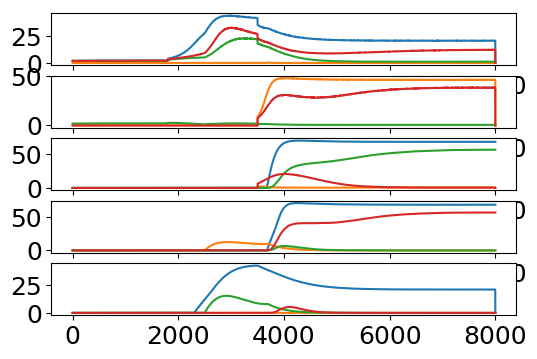

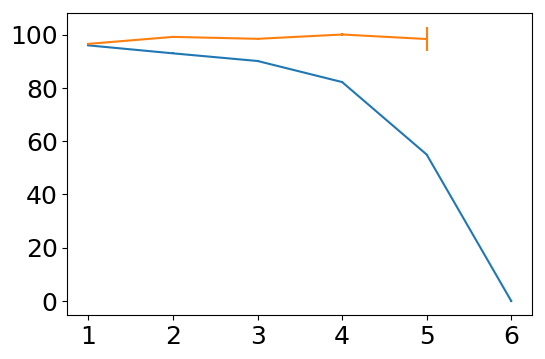

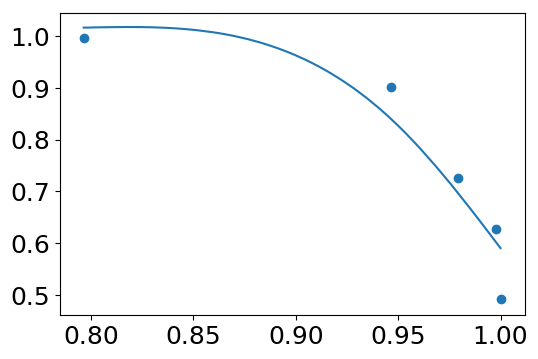

In [22]:
plot_figure_1()

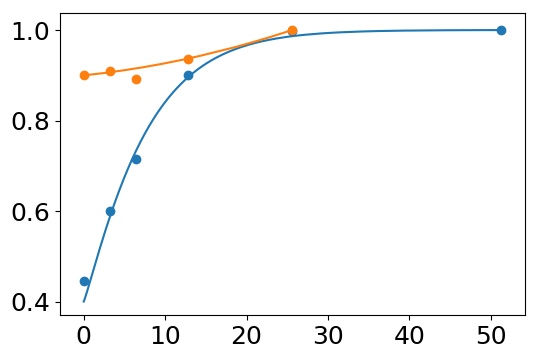

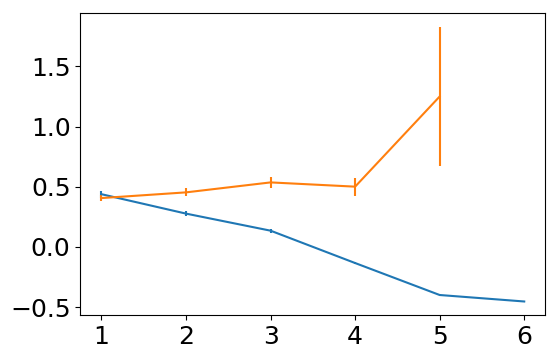

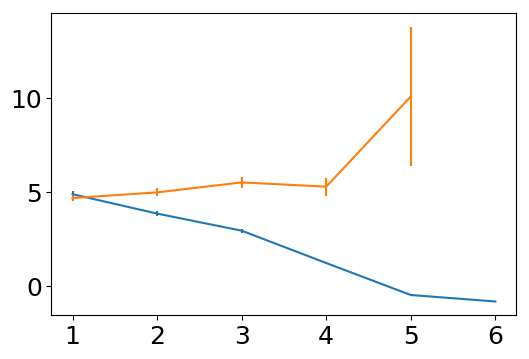

In [23]:
plot_figure_2()

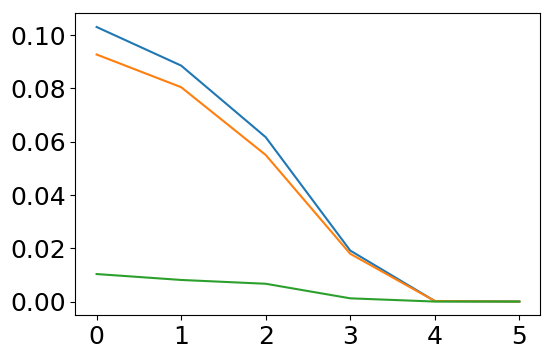

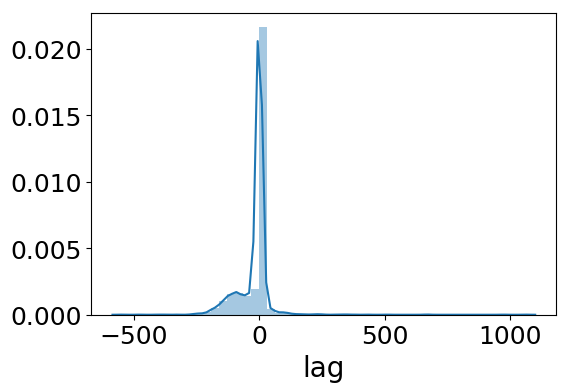

In [24]:
plot_figure_3()

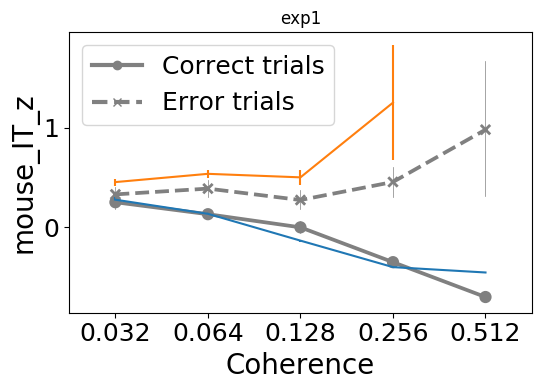

In [35]:
plot_mouse_IT_Z(choices_1, 'exp1', var='mouse_IT_z')

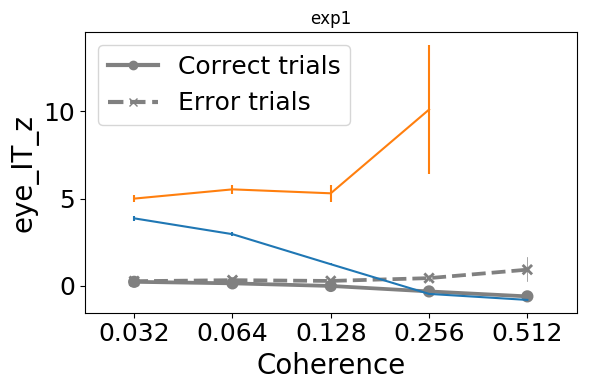

In [36]:
plot_eye_IT_Z(choices_1, 'exp1', var='eye_IT_z')